## U.5.L5.P4 - Choosing the right experiment tests

Thinkful Data Science Bootcamp

Emile Badran - 1/August/2018


Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions and explain why you chose the approach.

In this dataset, the same participants answered questions in 2012 and again 2014. Here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html) with information about the variable coding and content.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Let's start by looking at some descriptive statistics, including the count, mean, and standard deviation by year and country.

In [3]:
# inspect descriptive statistics
df[['cntry', 'year', 'ppltrst']].groupby(['cntry','year']).describe()

ppltrst                                               
             count      mean       std  min   25%  50%  75%   max
cntry year                                                       
CH    6      773.0  5.677878  2.130701  0.0  4.00  6.0  7.0  10.0
      7      773.0  5.751617  2.143888  0.0  5.00  6.0  7.0  10.0
CZ    6      651.0  4.362519  2.409738  0.0  3.00  4.0  6.0  10.0
      7      657.0  4.424658  2.305389  0.0  3.00  5.0  6.0  10.0
DE    6       14.0  5.214286  1.528125  3.0  4.25  5.0  6.5   8.0
      7       14.0  5.357143  2.530039  2.0  3.25  5.5  7.0  10.0
ES    6     1213.0  5.114592  2.183623  0.0  4.00  5.0  7.0  10.0
      7     1211.0  4.895128  2.148165  0.0  3.00  5.0  6.0  10.0
NO    6      730.0  6.649315  1.749868  0.0  5.00  7.0  8.0  10.0
      7      730.0  6.598630  1.811183  0.0  5.00  7.0  8.0  10.0
SE    6      906.0  6.058499  2.055554  0.0  5.00  7.0  8.0  10.0
      7      908.0  6.257709  2.005422  0.0  5.00  7.0  8.0  10.0

To check whether our distributions are normal, we'll plot people's trust responses for each country and year.

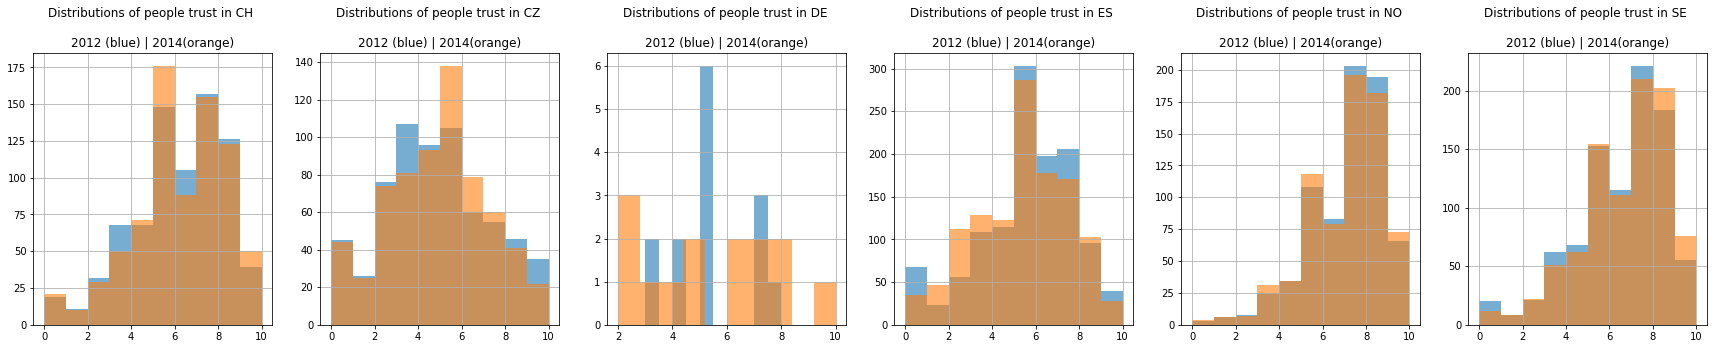

In [4]:
# instantiate the plot figure and set its size
plt.figure(figsize=(30,5))

# loop over countries and generate histograms - one plot for each country
for x, i in enumerate(df.cntry.unique()):
    for j in df.year.unique():
        plt.subplot(1,6,x+1)
        df[['cntry', 'year', 'ppltrst']][(df.cntry==i) & (df.year==j)].ppltrst.hist(alpha=.6)
        plt.title('Distributions of people trust in {} \n\n2012 (blue) | 2014(orange)'.format(i))
plt.show()

There aren't enough observations for Germany (DE) to make any valid inference.

Although the data in Norway (NO) and Sweden (SE) are more skewed, overall our distributions seem to be sufficiently normal.

From 2012 to 2014, people in the Czech Republic (CZ) and Sweden seem to have become more trustful. People in Switzerland (CH), Spain (ES), and Norway (NO) seem to have become less trustful. 

Let's test normality using the Shapiro-Wilk test statistic, W:

\begin{align} 
W=\frac { (\sum_{i=1}^n a_ix_{(i)} )^2}{ \sum_{i=1}^n (x_i-\bar{x})^2}
\end{align}

In [5]:
for i in df.cntry.unique():
    for j in df.year.unique():
        print('\nShapiro-Wilkins normality score - {}, year #{}'.format(i, j))
        print(stats.shapiro(df[(df.cntry==i) & (df.year==j) & (df.ppltrst.notna())].ppltrst))


Shapiro-Wilkins normality score - CH, year #6
(0.9519361853599548, 3.4958809444132896e-15)

Shapiro-Wilkins normality score - CH, year #7
(0.9538647532463074, 7.692136586977955e-15)

Shapiro-Wilkins normality score - CZ, year #6
(0.9675253629684448, 8.030776738054968e-11)

Shapiro-Wilkins normality score - CZ, year #7
(0.9720321893692017, 7.055935835609262e-10)

Shapiro-Wilkins normality score - DE, year #6
(0.9013110399246216, 0.1178363636136055)

Shapiro-Wilkins normality score - DE, year #7
(0.9425466060638428, 0.4519253373146057)

Shapiro-Wilkins normality score - ES, year #6
(0.9496549367904663, 5.989953442559737e-20)

Shapiro-Wilkins normality score - ES, year #7
(0.9663764834403992, 3.892258005954379e-16)

Shapiro-Wilkins normality score - NO, year #6
(0.9212563037872314, 4.566682699158387e-19)

Shapiro-Wilkins normality score - NO, year #7
(0.9296155571937561, 5.131845063891235e-18)

Shapiro-Wilkins normality score - SE, year #6
(0.9355120658874512, 2.3820653556873973e-19)

Sh

The Shapiro-Wilkins method in SciPy returns a tuple where the first value is the W test statistic and the second value is the p-value. W-scores near 1 with p-values that are less than or equal to 0.05 indicate that the distribution is normal.

We can notice that all distributions are normal, except for Germany, where the p-values for both years are quite high. To illustrate, the test indicates that there's a 45% probability that the W-score of 0.9425 from Germany in year #7 is obtained by chance.

#### Comparing observations from 2012 and 2014

Our distributions are normal and we have a dependent group (the survey had the same respondents in 2012 and 2014). Therefore, we'll use t-tests for paired samples to compare the observations from the two survey editions.

In [6]:
# create a data frame with separate columns for each year
df_ppltrst = df[['cntry','ppltrst']][df.year==6]
df_ppltrst.reset_index(inplace=True, drop=True)
df_ppltrst.columns = ['cntry','ppltrst_2012']
df_ppltrst['ppltrst_2014'] = df['ppltrst'][df.year==7].values

# inspect the number of rows and columns
print(df_ppltrst.shape)

# drop null values
df_ppltrst.dropna(axis=0, inplace=True)

# inspect the number of rows and columns after dropping null values
print(df_ppltrst.shape)

df_ppltrst.head()

(4297, 3)
(4283, 3)


,cntry,ppltrst_2012,ppltrst_2014
0,CH,3.0,8.0
1,CH,5.0,4.0
2,CH,8.0,8.0
3,CH,6.0,7.0
4,CH,6.0,4.0


In [7]:
for i in df_ppltrst.cntry.unique():
        print('\nPaired-samples t-test scores - {}'.format(i))
        print(
              stats.ttest_rel(
                  df_ppltrst[(df_ppltrst.cntry==i)].ppltrst_2012,
                  df_ppltrst[(df_ppltrst.cntry==i)].ppltrst_2014
              )
        )


Paired-samples t-test scores - CH
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

Paired-samples t-test scores - CZ
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.6171292682404208)

Paired-samples t-test scores - DE
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

Paired-samples t-test scores - ES
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)

Paired-samples t-test scores - NO
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.6120925701518767)

Paired-samples t-test scores - SE
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.0390078167095776)


From the above results, we can conclude that only countries with statistically significant changes in people trust from 2012 to 2014 were Spain and Sweden.

    Spain 2012: mean people trust was 5.114592 (± 2.183623)
    Spain 2014: mean people trust was 4.895128 (± 2.148165)
    (t(1210) = 2.4561906976601646, p = 0.014181580725321856)


    Sweden 2012: mean people trust was 6.058499 (± 2.055554)
    Sweden 2014: mean people trust was 6.257709 (± 2.005422)
    (t(905) = -2.0671082026033982, p = 0.0390078167095776)

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

We'll do the same procedure as in question 1:
- visualize descriptive statistics
- plot histograms of the distribution of observations to check for normality
- double-check normality with the Shapiro-Wilkins normality score
- calculate the paired-samples t-statistic

In [8]:
# inspect descriptive statistics
df[['cntry', 'year', 'happy']].groupby(['cntry','year']).describe()

happy                                                
             count      mean       std  min   25%  50%   75%   max
cntry year                                                        
CH    6      770.0  8.088312  1.437920  0.0  7.00  8.0  9.00  10.0
      7      773.0  8.116429  1.405725  0.0  7.00  8.0  9.00  10.0
CZ    6      646.0  6.770898  2.053582  0.0  5.00  7.0  8.00  10.0
      7      652.0  6.914110  1.902860  0.0  6.00  7.0  8.00  10.0
DE    6       14.0  7.428571  1.650841  4.0  6.25  8.0  8.00  10.0
      7       14.0  7.857143  1.292412  5.0  7.25  8.0  8.75  10.0
ES    6     1212.0  7.548680  1.913084  0.0  7.00  8.0  9.00  10.0
      7     1212.0  7.419967  1.872315  0.0  7.00  8.0  9.00  10.0
NO    6      727.0  8.251719  1.427270  0.0  8.00  8.0  9.00  10.0
      7      731.0  7.915185  1.581027  0.0  7.00  8.0  9.00  10.0
SE    6      907.0  7.907387  1.521814  1.0  7.00  8.0  9.00  10.0
      7      905.0  7.946961  1.406155  3.0  7.00  8.0  9.00  10.0

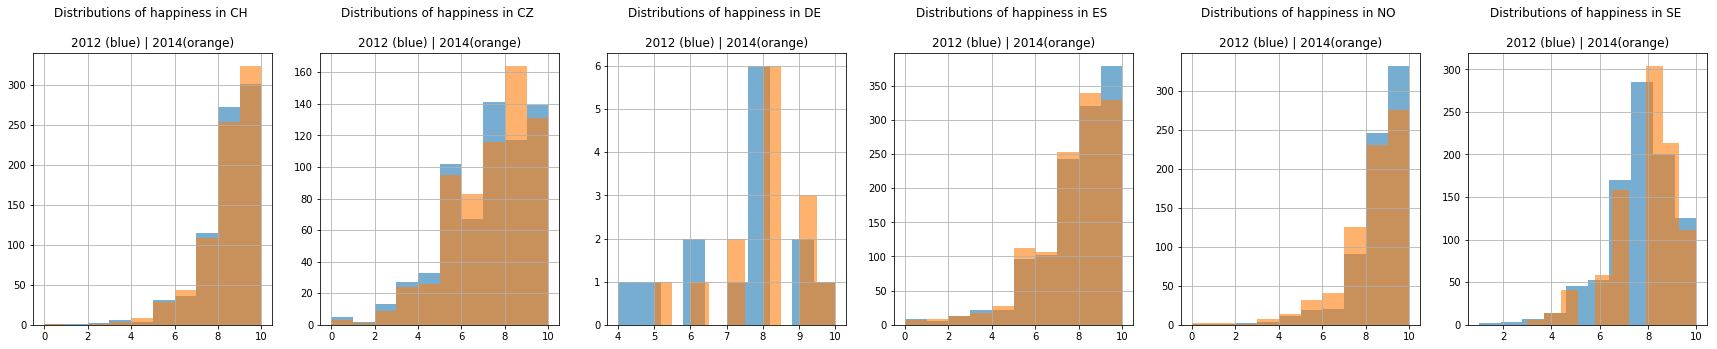

In [9]:
# instantiate the plot figure and set its size
plt.figure(figsize=(30,5))

# loop over countries and generate histograms - one plot for each country
for x, i in enumerate(df.cntry.unique()):
    for j in df.year.unique():
        plt.subplot(1,6,x+1)
        df[['cntry', 'year', 'happy']][(df.cntry==i) & (df.year==j)].happy.hist(alpha=.6)
        plt.title('Distributions of happiness in {} \n\n2012 (blue) | 2014(orange)'.format(i))
plt.show()

In [10]:
for i in df.cntry.unique():
    for j in df.year.unique():
        print('\nShapiro-Wilkins normality score - {}, year #{}'.format(i, j))
        print(stats.shapiro(df[(df.cntry==i) & (df.year==j) & (df.happy.notna())].happy))


Shapiro-Wilkins normality score - CH, year #6
(0.8790069222450256, 5.282947050862656e-24)

Shapiro-Wilkins normality score - CH, year #7
(0.8895691633224487, 4.494222618578247e-23)

Shapiro-Wilkins normality score - CZ, year #6
(0.9485079050064087, 3.2762790554531976e-14)

Shapiro-Wilkins normality score - CZ, year #7
(0.9416089653968811, 2.5235815651389716e-15)

Shapiro-Wilkins normality score - DE, year #6
(0.916941225528717, 0.1986599564552307)

Shapiro-Wilkins normality score - DE, year #7
(0.9213663339614868, 0.23006466031074524)

Shapiro-Wilkins normality score - ES, year #6
(0.90250164270401, 4.254964729854498e-27)

Shapiro-Wilkins normality score - ES, year #7
(0.9102423787117004, 3.8794469092978745e-26)

Shapiro-Wilkins normality score - NO, year #6
(0.8509966731071472, 1.3336539163043988e-25)

Shapiro-Wilkins normality score - NO, year #7
(0.8809076547622681, 3.1033939472688407e-23)

Shapiro-Wilkins normality score - SE, year #6
(0.9038249254226685, 1.9533988305248914e-23)



It seems that although skewed, the data is sufficiently normal for all countries, with the exception of Germany. We'll go ahead and calculate the paired-samples t-statistic to compare observations from 2012 and 2014.

In [11]:
# create a data frame with separate columns for each year
df_happy = df[['cntry','happy']][df.year==6]
df_happy.reset_index(inplace=True, drop=True)
df_happy.columns = ['cntry','happy_2012']
df_happy['happy_2014'] = df['happy'][df.year==7].values

# inspect the number of rows and columns
print(df_happy.shape)

# drop null values
df_happy.dropna(axis=0, inplace=True)

# inspect the number of rows and columns after dropping null values
print(df_happy.shape)

df_happy.head()

(4297, 3)
(4266, 3)


,cntry,happy_2012,happy_2014
0,CH,8.0,9.0
1,CH,9.0,6.0
2,CH,7.0,8.0
3,CH,10.0,9.0
4,CH,8.0,8.0


In [12]:
for i in df_happy.cntry.unique():
        print('\nPaired-samples t-test scores - {}'.format(i))
        print(
              stats.ttest_rel(
                  df_happy[(df_happy.cntry==i)].happy_2012,
                  df_happy[(df_happy.cntry==i)].happy_2014
              )
        )


Paired-samples t-test scores - CH
Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355428359)

Paired-samples t-test scores - CZ
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894534)

Paired-samples t-test scores - DE
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

Paired-samples t-test scores - ES
Ttest_relResult(statistic=1.613832417735418, pvalue=0.1068245155648069)

Paired-samples t-test scores - NO
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.0674530134057013e-05)

Paired-samples t-test scores - SE
Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591234161)


Norway was the only country with statistically significant changes in happiness from 2012 to 2014:

    2012: mean happiness was 8.251719 (± 1.427270)
    2014: mean happiness was 7.915185 (± 1.581027)
    (t(726) = 4.2856826576235925, p = 2.0674530134057013e-05)

### 3. Who reported watching more TV in 2012, men or women?

Here we're comparing two independent samples (men vs women). So we'll take the average TV **score** for each group and calculate the independent t-statistic to see if there are significant differences in TV time per group in each country.

Let's start by looking at the sample distributions to check for normality.

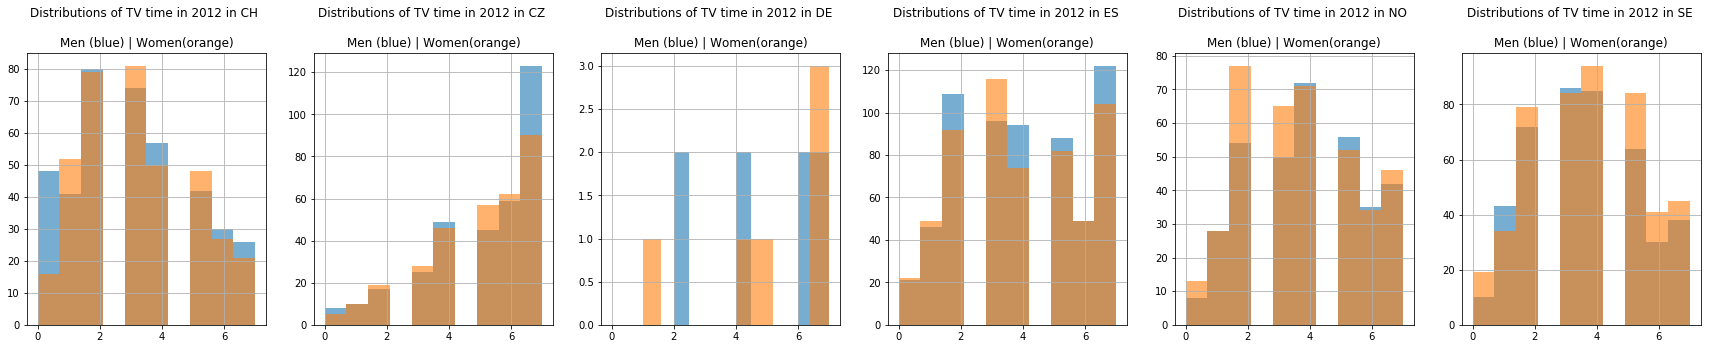

In [13]:
# instantiate the plot figure and set its size
plt.figure(figsize=(30,5))

# loop over countries and generate histograms - one plot for each country
for x, i in enumerate(df.cntry.unique()):
    for j in df.gndr.unique():
        plt.subplot(1,6,x+1)
        df[(df.cntry==i) & (df.gndr==j) & (df.year==6)].tvtot.hist(alpha=.6)
        plt.title('Distributions of TV time in 2012 in {} \n\nMen (blue) | Women(orange)'.format(i))
plt.show()

In [14]:
for i in df.cntry.unique():
    for j in [1.0, 2.0]:
        print('\nShapiro-Wilkins normality score - {}, sex #{}'.format(i, j))
        print(stats.shapiro(df[(df.cntry==i) & (df.gndr==j) & (df.year==6) & (df.tvtot.notna())].tvtot))


Shapiro-Wilkins normality score - CH, sex #1.0
(0.9467601180076599, 2.391432329940102e-10)

Shapiro-Wilkins normality score - CH, sex #2.0
(0.9455764889717102, 6.432369914488589e-11)

Shapiro-Wilkins normality score - CZ, sex #1.0
(0.8882426619529724, 1.780554057060485e-14)

Shapiro-Wilkins normality score - CZ, sex #2.0
(0.8497839570045471, 1.9270029328537385e-17)

Shapiro-Wilkins normality score - DE, sex #1.0
(0.8247385025024414, 0.09694678336381912)

Shapiro-Wilkins normality score - DE, sex #2.0
(0.8713548183441162, 0.15539178252220154)

Shapiro-Wilkins normality score - ES, sex #1.0
(0.9319267272949219, 1.0481470504153227e-15)

Shapiro-Wilkins normality score - ES, sex #2.0
(0.9280737638473511, 9.802001584991712e-17)

Shapiro-Wilkins normality score - NO, sex #1.0
(0.9456163048744202, 1.0570976732848791e-10)

Shapiro-Wilkins normality score - NO, sex #2.0
(0.9495185017585754, 1.7461562196174896e-09)

Shapiro-Wilkins normality score - SE, sex #1.0
(0.9565274715423584, 1.086399650

The sample distributions of the Czech Republic are quite skewed, but still acceptable according to the Shapiro-Wilkins test. As usual, we don't have sufficient observations from Germany.

The next table shows that there are some differences in the average amount of TV watched by men vs women in different countries:

In [15]:
# inspect descriptive statistics
df[['cntry','tvtot','gndr']][df.year==6].groupby(['cntry','gndr']).describe()

tvtot                                               
            count      mean       std  min   25%  50%   75%  max
cntry gndr                                                      
CH    1.0   374.0  3.213904  1.819530  0.0  2.00  3.0  5.00  7.0
      2.0   398.0  3.072864  1.998039  0.0  2.00  3.0  4.00  7.0
CZ    1.0   317.0  5.056782  1.809764  0.0  4.00  5.0  7.00  7.0
      2.0   336.0  5.223214  1.889688  0.0  4.00  6.0  7.00  7.0
DE    1.0     6.0  5.166667  2.401388  1.0  4.25  6.0  7.00  7.0
      2.0     8.0  4.750000  2.052873  2.0  3.50  5.0  6.25  7.0
ES    1.0   588.0  3.926871  2.058702  0.0  2.00  4.0  6.00  7.0
      2.0   625.0  4.025600  2.066053  0.0  2.00  4.0  6.00  7.0
NO    1.0   386.0  3.748705  1.914147  0.0  2.00  4.0  5.00  7.0
      2.0   345.0  3.936232  1.882135  0.0  2.00  4.0  5.00  7.0
SE    1.0   480.0  3.752083  1.846680  0.0  2.00  4.0  5.00  7.0
      2.0   428.0  3.623832  1.801923  0.0  2.00  4.0  5.00  7.0

Also notice that there are differences in the variance between each sample (the variance is equal to the square of the standard deviation). For this reason, we'll set SciPy's independent t-test method to perform Welch's t-test, which does not assume equal population variance. Let's see what the t-statistic tells us about our mean sample differences.

In [16]:
# generate a pivot table with the mean TV scores for each country and sex in 2012
df_tv = df[df.year==6].pivot_table(values='tvtot', index='cntry', columns='gndr')

# add columns with empty values
df_tv['t-score'] = np.nan
df_tv['p-value'] = np.nan

# calculate the t-score and p-values and populate the empty columns on our pivot table
for i in df.cntry.unique():
    df_tv.loc[i,'t-score'], df_tv.loc[i,'p-value'] = stats.ttest_ind(
        df[(df.cntry==i) & (df.year==6) & (df.gndr==1.0)].tvtot,
        df[(df.cntry==i) & (df.year==6) & (df.gndr==2.0)].tvtot,
        nan_policy='omit', equal_var=False)

# add a column with the "Degrees of Freedom" for each sample group (DF = the number of observations -1)
df_tv['DF_men'] = df[df.year==6].pivot_table(
    values='tvtot', index='cntry', columns='gndr', aggfunc='count')[1.0]-1

df_tv['DF_women'] = df[df.year==6].pivot_table(
    values='tvtot', index='cntry', columns='gndr', aggfunc='count')[2.0]-1
    
print('\nAverage TV time score per country and sex, and corresponding t-statistics, p-values and Degrees of Freedom.')
print('\nMen = 1.0 | Women = 2.0')
df_tv


Average TV time score per country and sex, and corresponding t-statistics, p-values and Degrees of Freedom.

Men = 1.0 | Women = 2.0


gndr,1.0,2.0,t-score,p-value,DF_men,DF_women
cntry,,,,,,
CH,3.213904,3.072864,1.026382,0.305034,373,397
CZ,5.056782,5.223214,-1.149592,0.250734,316,335
DE,5.166667,4.750000,0.341588,0.739825,5,7
ES,3.926871,4.025600,-0.833295,0.404843,587,624
NO,3.748705,3.936232,-1.334045,0.182610,385,344
SE,3.752083,3.623832,1.058128,0.290281,479,427


There are no significant differences between how much men and women watched TV in any of the countries. Also, once again, there aren't sufficient observations to infer about Germany.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Let's start all over again and do pretty much the same thing as in the previous question.

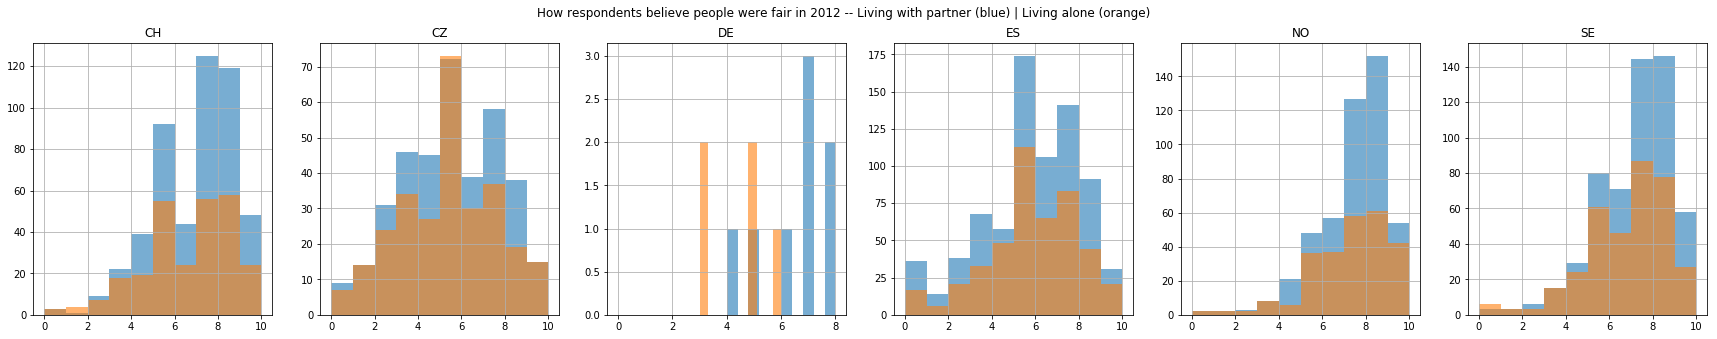

In [17]:
# instantiate the plot figure and set its size
plt.figure(figsize=(30,5))
plt.suptitle('How respondents believe people were fair in 2012 -- Living with partner (blue) | Living alone (orange)')

# loop over countries and generate histograms - one plot for each country
for x, i in enumerate(df.cntry.unique()):
    for j in df.partner.unique():
        plt.subplot(1,6,x+1)
        df[(df.cntry==i) & (df.partner==j) & (df.year==6)].pplfair.hist(alpha=.6)
        plt.title(i)
plt.show()

In [18]:
for i in df.cntry.unique():
    for j in [1.0, 2.0]:
        print('\nShapiro-Wilkins normality score - {}, partner #{}'.format(i, j))
        print(stats.shapiro(df[(df.cntry==i) & (df.partner==j) & (df.year==6) & (df.pplfair.notna())].pplfair))


Shapiro-Wilkins normality score - CH, partner #1.0
(0.9460236430168152, 1.4885262076755335e-12)

Shapiro-Wilkins normality score - CH, partner #2.0
(0.9438077211380005, 1.3279453980885592e-08)

Shapiro-Wilkins normality score - CZ, partner #1.0
(0.9702855944633484, 7.993388635441079e-07)

Shapiro-Wilkins normality score - CZ, partner #2.0
(0.9717816114425659, 2.5215673304046504e-05)

Shapiro-Wilkins normality score - DE, partner #1.0
(0.8972706198692322, 0.27299121022224426)

Shapiro-Wilkins normality score - DE, partner #2.0
(0.8519075512886047, 0.20062367618083954)

Shapiro-Wilkins normality score - ES, partner #1.0
(0.9496816396713257, 2.1920003535409087e-15)

Shapiro-Wilkins normality score - ES, partner #2.0
(0.9587615728378296, 6.382132045068545e-10)

Shapiro-Wilkins normality score - NO, partner #1.0
(0.908233642578125, 2.54208378226188e-16)

Shapiro-Wilkins normality score - NO, partner #2.0
(0.9295005202293396, 1.2144090177912403e-09)

Shapiro-Wilkins normality score - SE, pa

Normality scores are looking good. As usual, we don't have sufficient observations from Germany.

Since there are considerable differences in the number of observations between men and women, it's difficult to tell changes between samples by looking at a histogram. But the boxplot and table below show that in most countries (with the possible exception of Germany and Sweden), living with a partner doesn't change the belief that people are fair.

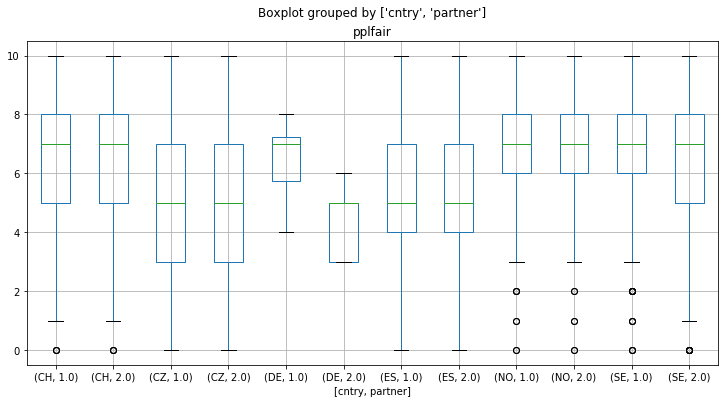

In [19]:
# generate a boxplot grouping by country and partner
df[['cntry','pplfair','partner']][df.year==6].boxplot(by=['cntry','partner'], figsize=(12,6))
plt.show()

In [20]:
# inspect descriptive statistics
df[['cntry','pplfair','partner']][df.year==6].groupby(['cntry','partner']).describe()

pplfair                                                
                count      mean       std  min   25%  50%   75%   max
cntry partner                                                        
CH    1.0       502.0  6.466135  1.895959  0.0  5.00  7.0  8.00  10.0
      2.0       268.0  6.134328  2.072799  0.0  5.00  7.0  8.00  10.0
CZ    1.0       367.0  5.005450  2.245815  0.0  3.00  5.0  7.00  10.0
      2.0       280.0  4.882143  2.239360  0.0  3.00  5.0  7.00  10.0
DE    1.0         8.0  6.500000  1.414214  4.0  5.75  7.0  7.25   8.0
      2.0         5.0  4.400000  1.341641  3.0  3.00  5.0  5.00   6.0
ES    1.0       757.0  5.330251  2.235902  0.0  4.00  5.0  7.00  10.0
      2.0       451.0  5.390244  2.152682  0.0  4.00  5.0  7.00  10.0
NO    1.0       474.0  6.968354  1.624681  0.0  6.00  7.0  8.00  10.0
      2.0       254.0  6.842520  1.839080  0.0  6.00  7.0  8.00  10.0
SE    1.0       555.0  6.702703  1.765057  0.0  6.00  7.0  8.00  10.0
      2.0       350.0  6.331429  1.928191  0.0  5.00  7.0  8.00  10.0

Also notice that there are differences in the variance between each sample (the variance is equal to the square of the standard deviation). For this reason, we'll set SciPy's independent t-test method to perform Welch's t-test, which does not assume equal population variance. Let's see what the t-statistic tells us about our mean sample differences.

In [21]:
# generate a pivot table with the mean TV scores for each country and sex in 2012
df_fair = df[df.year==6].pivot_table(values='pplfair', index='cntry', columns='partner')

# add columns with empty values
df_fair['t-score'] = np.nan
df_fair['p-value'] = np.nan

# calculate the t-score and p-values and populate the empty columns on our pivot table
for i in df.cntry.unique():
    df_fair.loc[i,'t-score'], df_fair.loc[i,'p-value'] = stats.ttest_ind(
        df[(df.cntry==i) & (df.year==6) & (df.partner==1.0)].pplfair,
        df[(df.cntry==i) & (df.year==6) & (df.partner==2.0)].pplfair,
        nan_policy='omit', equal_var=False)

# add a column with the "Degrees of Freedom" for each sample group (DF = the number of observations -1)
df_fair['DF_men'] = df[df.year==6].pivot_table(
    values='pplfair', index='cntry', columns='partner', aggfunc='count')[1.0]-1

df_fair['DF_women'] = df[df.year==6].pivot_table(
    values='pplfair', index='cntry', columns='partner', aggfunc='count')[2.0]-1
    
print('\nHow respondents believe people were fair in 2012 (sample average responses).')
print('\nLiving with partner = 1.0 | Living alone = 2.0')
df_fair


How respondents believe people were fair in 2012 (sample average responses).

Living with partner = 1.0 | Living alone = 2.0


partner,1.0,2.0,t-score,p-value,DF_men,DF_women
cntry,,,,,,
CH,6.466135,6.134328,2.178778,0.029810,501,267
CZ,5.005450,4.882143,0.693076,0.488529,366,279
DE,6.500000,4.400000,2.688774,0.024838,7,4
ES,5.330251,5.390244,-0.461770,0.644349,756,450
NO,6.968354,6.842520,0.915687,0.360305,473,253
SE,6.702703,6.331429,2.913768,0.003686,554,349


Respondents in Switzerland (CH), Germany (DE), and Sweden (SE) think people are fair more often when they live with partners. It is interesting to notice that the result is statistically significant in Germany, even with a few observations. The reason is that the difference in responses was very high (2.1 points higher for those living with partners).

###  5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

We'll drop Germany and the Czech Republic and compare the other four countries. 

The one-way ANOVA test can be used to see if there are differences among independent variables with normal distributions. Let's start by checking the sample distributions for normality.

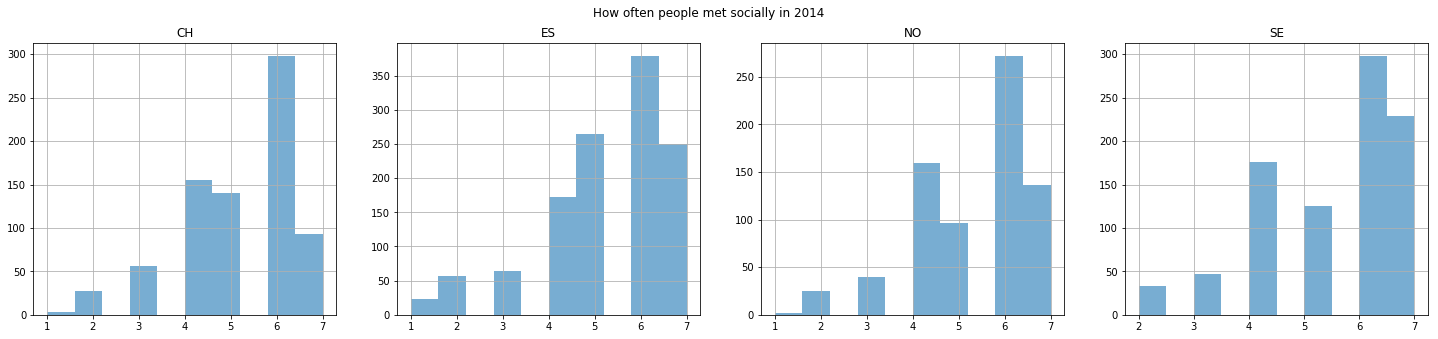

In [22]:
# instantiate the plot figure and set its size
plt.figure(figsize=(25,5))
plt.suptitle('How often people met socially in 2014')

# loop over countries and generate histograms - one plot for each country
for x, i in enumerate(['CH','ES','NO','SE']):
    plt.subplot(1,4,x+1)
    df[(df.cntry==i) & (df.year==7)].sclmeet.hist(alpha=.6)
    plt.title(i)
plt.show()

In [23]:
for i in ['CH','ES','NO','SE']:
    print('\nShapiro-Wilkins normality score - {}'.format(i))
    print(stats.shapiro(df[(df.cntry==i) & (df.year==7) & (df.sclmeet.notna())].sclmeet))


Shapiro-Wilkins normality score - CH
(0.8974164724349976, 2.7436334896806913e-22)

Shapiro-Wilkins normality score - ES
(0.8880351781845093, 9.848293928138278e-29)

Shapiro-Wilkins normality score - NO
(0.8881818056106567, 1.422473605641294e-22)

Shapiro-Wilkins normality score - SE
(0.8798282146453857, 6.682967662559975e-26)


All our distributions are skewed, but still acceptable according to the Shapiro-Wilkins test.

The next boxplot show that people in Sweden have a more active social life:

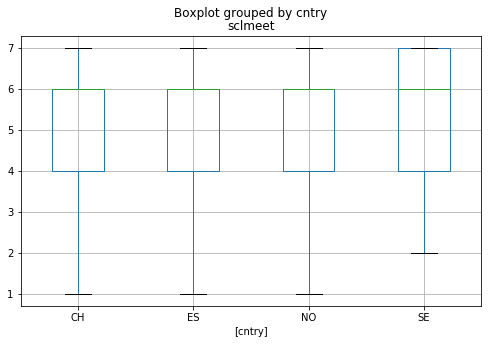

In [24]:
# generate a boxplot grouping by country
df[['cntry','sclmeet']][(df.year==7) & (~df.cntry.isin(['DE','CZ']))].boxplot(by=['cntry'], figsize=(8,5))
plt.show()

We can tell from the average sclmeet scores that Switzerland and Spain have the least active social lives.

In [25]:
# inspect descriptive statistics
df[['cntry','sclmeet']][(df.year==7) & (~df.cntry.isin(['DE','CZ']))].groupby(['cntry']).describe()

sclmeet                                             
        count      mean       std  min  25%  50%  75%  max
cntry                                                     
CH      772.0  5.160622  1.308499  1.0  4.0  6.0  6.0  7.0
ES     1211.0  5.260116  1.467855  1.0  4.0  6.0  6.0  7.0
NO      731.0  5.302326  1.347848  1.0  4.0  6.0  6.0  7.0
SE      908.0  5.426211  1.373098  2.0  4.0  6.0  7.0  7.0

Also notice that there are some differences in the variance between each sample (the variance is equal to the square of the standard deviation).

The one-way ANOVA F statistic is [considered to be robust to violations](http://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/) of the assumption of homoscedacity (A.K.A. homogeneity of variance) as long as group sizes are equal. Equal group sizes may be defined by the ratio of the largest to smallest group being less than 1.5.

Therefore, let's see what the one-way ANOVA test tells us about our mean sample differences. And to be on the safe side, we'll run a post-hoc Tukey's Honest Significant Differences (HSD) Test to double-check our result and to see how each country compares to the other.

In [26]:
stats.f_oneway(
    df[(df.cntry=='CH') & (df.year==7) & (df.sclmeet.notna())].sclmeet,
    df[(df.cntry=='ES') & (df.year==7) & (df.sclmeet.notna())].sclmeet,
    df[(df.cntry=='NO') & (df.year==7) & (df.sclmeet.notna())].sclmeet,
    df[(df.cntry=='SE') & (df.year==7) & (df.sclmeet.notna())].sclmeet)

F_onewayResult(statistic=5.361723659351843, pvalue=0.001106621438920195)

One-way ANOVA tells us that there are differences between groups. Let's find out where the differences are with the Tukey's HSD method.

In [27]:
# create a data frame with the selected columns and countries, and drop null values 
df_sclmeet = df[['cntry','sclmeet']][(~df.cntry.isin(['DE','CZ'])) & (df.year==7)].dropna()

# instantiate the Tukey method and set the parameters
tukey = pairwise_tukeyhsd(endog= df_sclmeet.sclmeet,
                          groups= df_sclmeet.cntry,
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,ES,0.0995,-0.0647,0.2637,False
CH,NO,0.1417,-0.0423,0.3257,False
CH,SE,0.2656,0.091,0.4402,True
ES,NO,0.0422,-0.1248,0.2092,False
ES,SE,0.1661,0.0096,0.3226,True
NO,SE,0.1239,-0.0533,0.3011,False


So at a probability threshold of 0.05, there are statistically significant differences between Switzerland and Sweden, and Spain and Sweden. Sweden is the country that stands out as where people spend most time in social meetings.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

To do this comparison, we'll create age classes with bins ranging 15-years. We'll also treat outliers by rounding ages above 90.

The first step, again, will be to check sample distributions for normality.

In [28]:
# create a data frame with the selected columns and countries, and drop null values 
df_sclact = df[['cntry','sclact','agea']][(~df.cntry.isin(['DE','CZ'])) & (df.year==7)].dropna()

# treat outliers by rounding ages above 90
df_sclact.agea = df_sclact.agea.apply(lambda x: 90 if x>=90 else x)

# create age classes
df_sclact['agec'] = pd.cut(df_sclact.agea, bins=5, precision=0, include_lowest=False)

# convert categories to string
df_sclact.agec = df_sclact.agec.astype(str)

# inspect age group counts
print('Number of observations per age group:')
df_sclact.agec.value_counts()

Number of observations per age group:


(45.0, 60.0]    913
(30.0, 45.0]    844
(15.0, 30.0]    773
(60.0, 75.0]    706
(75.0, 90.0]    254
Name: agec, dtype: int64

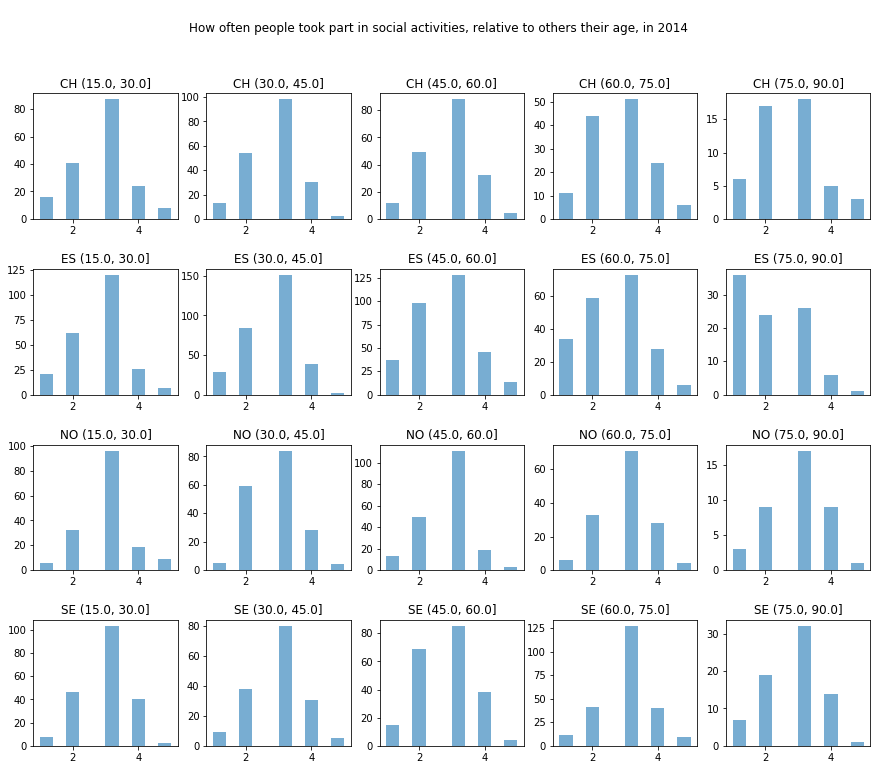

In [29]:
# instantiate the plot figure and set its size
f, axarr = plt.subplots(4, 5, figsize=(15,12))
f.subplots_adjust(hspace=0.4)
plt.suptitle('\nHow often people took part in social activities, relative to others their age, in 2014')

# loop over countries and generate histograms - one plot for each country and age class
for x, country in enumerate(['CH','ES','NO','SE']):
    for y, ageclass in enumerate(sorted(df_sclact.agec.unique())):
        axarr[x, y].hist(df_sclact[(df_sclact.cntry==country) & (df_sclact.agec==ageclass)].sclact, alpha=.6)
        axarr[x, y].set_title('{} {}'.format(country, ageclass))
plt.show()

Our distributions are definitely normal.

It seems that people above 60 years in Spain and (to a lesser extent) in Switzerland spend less time in social activities than in the other countries. The boxplots below confirm this.

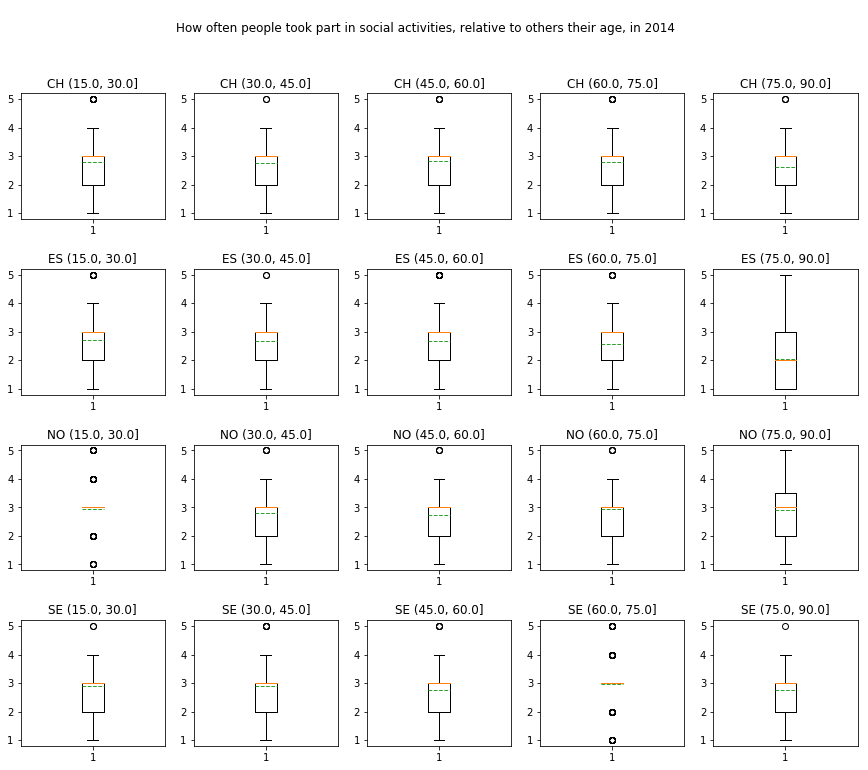

In [30]:
# instantiate the plot figure and set its size
f, axarr = plt.subplots(4, 5, figsize=(15,12))
f.subplots_adjust(hspace=0.4)
plt.suptitle('\nHow often people took part in social activities, relative to others their age, in 2014')

# loop over countries and generate histograms - one plot for each country and age class
for x, country in enumerate(['CH','ES','NO','SE']):
    for y, ageclass in enumerate(sorted(df_sclact.agec.unique())):
        axarr[x, y].boxplot(df_sclact[(df_sclact.cntry==country) & (df_sclact.agec==ageclass)].sclact,
                            patch_artist=False, meanline=True, showmeans=True)
        axarr[x, y].set_title('{} {}'.format(country, ageclass))
plt.show()

In [31]:
# generate a pivot table with the mean TV scores for each country and sex in 2012
df_sclact_p = df_sclact.pivot_table(values='sclact', index='cntry', columns='agec')
df_sclact_p

agec,"(15.0, 30.0]","(30.0, 45.0]","(45.0, 60.0]","(60.0, 75.0]","(75.0, 90.0]"
cntry,,,,,
CH,2.812500,2.766497,2.821622,2.779412,2.632653
ES,2.728814,2.671053,2.689441,2.565000,2.053763
NO,2.956790,2.816667,2.743590,2.936620,2.897436
SE,2.909548,2.907975,2.748815,2.978070,2.767123


Let's see what the one-way ANOVA test tells us about our mean sample differences. And to be on the safe side, we'll run a post-hoc Tukey's Honest Significant Differences (HSD) Test to double-check our result and to see how each country compares to the other.

In [32]:
for i in df_sclact.cntry.unique():
    print('\n',i, '-', stats.f_oneway(
        df_sclact[(df_sclact.cntry==i) & (df_sclact.agec=='(15.0, 30.0]')].sclact,
        df_sclact[(df_sclact.cntry==i) & (df_sclact.agec=='(30.0, 45.0]')].sclact,
        df_sclact[(df_sclact.cntry==i) & (df_sclact.agec=='(45.0, 60.0]')].sclact,
        df_sclact[(df_sclact.cntry==i) & (df_sclact.agec=='(60.0, 75.0]')].sclact,
        df_sclact[(df_sclact.cntry==i) & (df_sclact.agec=='(75.0, 90.0]')].sclact))


 CH - F_onewayResult(statistic=0.4825525766207137, pvalue=0.7485768004874112)

 ES - F_onewayResult(statistic=10.097165302998183, pvalue=4.922171018402642e-08)

 NO - F_onewayResult(statistic=1.9935885652399676, pvalue=0.09375622050430772)

 SE - F_onewayResult(statistic=2.3926741080084057, pvalue=0.049148383430567405)


One-way ANOVA tells us that there are statistically significant differences in the time spent on social activities between age groups in Spain and Sweden. Let's find out where the differences are with the Tukey's HSD method.

In [33]:
# Calculate Tukey's HSD for each country
for i in df_sclact.cntry.unique():
    print('\nCountry: ',i)
    # instantiate the Tukey method and set the parameters
    tukey = pairwise_tukeyhsd(endog= df_sclact.sclact,
                              groups= df_sclact.agec,
                              alpha=0.05)         # Significance level

    print(tukey.summary())


Country:  CH
    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
(15.0, 30.0] (30.0, 45.0]  -0.072   -0.194  0.0499 False 
(15.0, 30.0] (45.0, 60.0] -0.1007  -0.2204  0.0191 False 
(15.0, 30.0] (60.0, 75.0] -0.0277  -0.1552  0.0998 False 
(15.0, 30.0] (75.0, 90.0] -0.3422  -0.5193  -0.165  True 
(30.0, 45.0] (45.0, 60.0] -0.0286  -0.1456  0.0883 False 
(30.0, 45.0] (60.0, 75.0]  0.0443  -0.0806  0.1692 False 
(30.0, 45.0] (75.0, 90.0] -0.2701  -0.4454 -0.0948  True 
(45.0, 60.0] (60.0, 75.0]  0.0729  -0.0498  0.1957 False 
(45.0, 60.0] (75.0, 90.0] -0.2415  -0.4153 -0.0677  True 
(60.0, 75.0] (75.0, 90.0] -0.3144  -0.4937 -0.1352  True 
---------------------------------------------------------

Country:  ES
    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
--------------------------------------------

So at a probability threshold of 0.05, Tukey's HSD statistic indicates that there are statistically significant differences in all countries when the oldest group is in the comparison:

    (15.0, 30.0] (75.0, 90.0]
    (30.0, 45.0] (75.0, 90.0]
    (45.0, 60.0] (75.0, 90.0]
    (60.0, 75.0] (75.0, 90.0]

One-way ANOVA, on the other hand, has shown that Spain and (to a lesser extent) Sweden stand out with greater within-group differences.